In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [2]:
data = np.loadtxt('ex1data1.txt')
X = data[:, 0]
y = data[:, 1]
m = len(y)
X = X.reshape(m, 1)
y = y.reshape(m, 1)

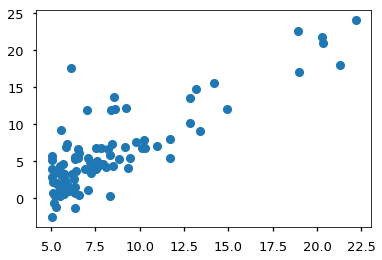

In [3]:
%matplotlib inline
plt.plot(X, y, ls = '', marker='o');

In [4]:
X = np.append(np.ones([m, 1]), data[:,0].reshape(m,1), axis=1)
theta = np.zeros([2, 1])

iterations = 1500
alpha = 0.01

In [5]:
def computeCost(X, y, theta):
    m = len(y)
    J = 1./(2.*m)*np.sum((np.dot(X,theta)-y)**2)
    return J

In [6]:
J = computeCost(X, y, theta)
print J # 32.07

32.072733877455676


In [7]:
J = computeCost(X, y, [[-1], [2]])
print J # 54.24

54.24245508201238


In [8]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros([num_iters, 1])
    for iter in range(num_iters):
        delta = np.dot(X, theta) - y
        dJ = 1./m * np.sum(delta*X, axis=0).reshape(-1,1)
        theta = theta - alpha * dJ
        J_history[iter] = computeCost(X, y, theta)
    return theta, J_history

In [9]:
theta = np.zeros([2, 1])
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print theta # [ [-3.6303], [1.1664] ]

[[-3.63029144]
 [ 1.16636235]]


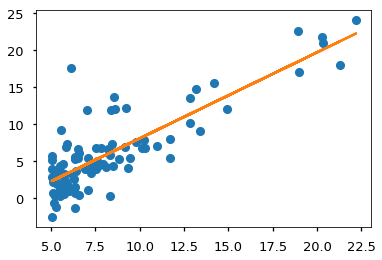

In [10]:
plt.plot(X[:,1], y, ls = '', marker='o');
plt.plot(X[:, 1], np.dot(X, theta));

In [11]:
predict1 = np.dot([1, 3.5], theta)  # population = 35000
predict2 = np.dot([1, 7], theta)    # population = 70000
print predict1*10000, predict2*10000   # 4519.76, 45342.45

[4519.7678677] [45342.45012945]


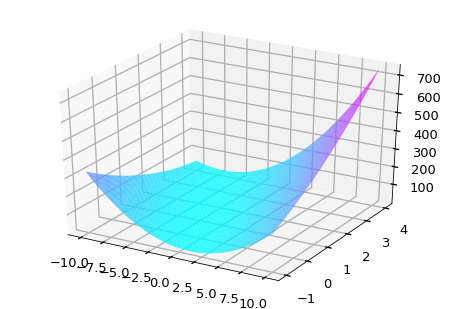

In [12]:
from mpl_toolkits.mplot3d import Axes3D

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros([len(theta0_vals), len(theta1_vals)])

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [[theta0_vals[i]],[theta1_vals[j]]]
        J_vals[i, j] = computeCost(X, y, t)
        
fig = plt.figure()
ax = Axes3D(fig)
ax_X, ax_Y = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(ax_X, ax_Y, J_vals, rstride=1, cstride=1, 
                cmap = plt.cm.cool);

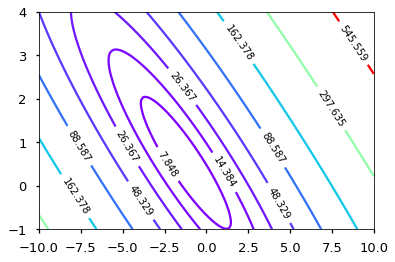

In [13]:
C = plt.contour(ax_X, 
                ax_Y, 
                J_vals, 
                np.logspace(-2, 3, 20), cmap=plt.cm.rainbow)
plt.clabel(C, inline=True,fontsize=10,colors='k');

In [14]:
#######################################

In [36]:
data = np.loadtxt('ex1data2.txt')
X = data[:, (0,1)]
y = data[:, 2].reshape(-1,1)
m = len(y)
print X[0:10,:]
print y[0:10]

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]]
[[399900.]
 [329900.]
 [369000.]
 [232000.]
 [539900.]
 [299900.]
 [314900.]
 [198999.]
 [212000.]
 [242500.]]


In [37]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

In [38]:
X, mu, sigma = featureNormalize(X)
X = X.reshape(m, -1)
X = np.append(np.ones([m, 1]), X, axis=1)

In [40]:
alpha = 0.01
num_iters = 400
theta = np.zeros([3,1])
theta, J_history = gradientDescent(X, y, 
            theta, alpha, num_iters)

In [41]:
theta

array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])

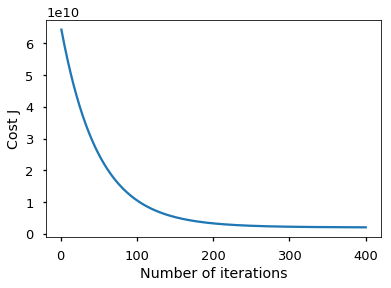

In [44]:
step = range(1, len(J_history)+1)
plt.plot(step, J_history);
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');

In [53]:
# Estimate the price of a 1650 sq-ft, 3 br house
# use normalized's result
xx = (np.array([1650, 3])-mu)/sigma
xx1 = np.append([1], xx, axis=0)
price1 = np.dot(xx1, theta)
print price1

[289221.54737122]


In [73]:
data = np.loadtxt('ex1data2.txt')
X = data[:, 0:2]
y = data[:, 2]
m = len(y)
X = np.append(np.ones([m,1]), X, axis=1)

In [78]:
X.shape[1]

3

In [80]:
def normalEqn(X, y):
    theta = np.zeros([X.shape[1], 1])
    p1 = np.dot(X.T, X)
    p2 = np.dot(np.linalg.pinv(p1), X.T)
    theta = np.dot(p2, y)
    return theta

In [82]:
theta = normalEqn(X, y).reshape(-1, 1)
theta

array([[89597.90954361],
       [  139.21067402],
       [-8738.01911255]])

In [83]:
price2 = np.dot(np.array([1, 1650, 3]), theta)
print price2

[293081.46433499]
